# Student Alcohol Consumption

In [0]:
# importando bibliotecas basicas
import pandas as pd
import numpy as np
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

plotly.tools.set_credentials_file(username='EulleSilva', api_key='udHtcUnAQHA1wNwQ1f1Q')

## Importando datasets

In [0]:
# Upload do dataset da turma de matemática
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving student-mat.csv to student-mat.csv
User uploaded file "student-mat.csv" with length 41983 bytes


In [0]:
# Upload do dataset da turma de portugues
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving student-por.csv to student-por.csv
User uploaded file "student-por.csv" with length 68558 bytes


In [0]:
# Importando dataset da turma de matemática
math_students = pd.read_csv("student-mat.csv",)

In [0]:
# Importando dataset da turma de matemática
port_students = pd.read_csv("student-por.csv",)


In [0]:
full_set = math_students.append(port_students)

## Deletar colunas que não serão utilizadas

In [0]:
# Deletar colunas do dataset dos estudantes de Matématica
math_students.drop(math_students.loc[:,['Mjob','Fjob','school','reason','traveltime','paid','nursery']],axis=1,inplace=True)
math_students.columns
# Deletar colunas do datasets/taset dos estudantes de Português
port_students.drop(port_students.loc[:,['Mjob','Fjob','school','reason','traveltime','paid','nursery']],axis=1,inplace=True)
port_students.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'guardian', 'studytime', 'failures', 'schoolsup', 'famsup',
       'activities', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Analisando as caracteristicas dos datasets

In [0]:
# Verificando variaveis da turma de matemática
math_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 26 columns):
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
guardian      395 non-null object
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
activities    395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 non-null int64
dtypes: int64(15), object(

In [0]:
# Verificando variaveis da turma de português
port_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 26 columns):
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
guardian      649 non-null object
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
activities    649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 non-null int64
Walc          649 non-null int64
health        649 non-null int64
absences      649 non-null int64
G1            649 non-null int64
G2            649 non-null int64
G3            649 non-null int64
dtypes: int64(15), object(

In [0]:
math_students.head(20)

,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,studytime,failures,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,mother,2,0,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,father,2,0,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,mother,2,3,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,mother,3,0,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,father,2,0,...,4,3,2,1,2,5,4,6,10,10
5,M,16,U,LE3,T,4,3,mother,2,0,...,5,4,2,1,2,5,10,15,15,15
6,M,16,U,LE3,T,2,2,mother,2,0,...,4,4,4,1,1,3,0,12,12,11
7,F,17,U,GT3,A,4,4,mother,2,0,...,4,1,4,1,1,1,6,6,5,6
8,M,15,U,LE3,A,3,2,mother,2,0,...,4,2,2,1,1,1,0,16,18,19
9,M,15,U,GT3,T,3,4,mother,2,0,...,5,5,1,1,1,5,0,14,15,15


In [0]:
port_students.head(5)

,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,studytime,failures,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,mother,2,0,...,4,3,4,1,1,3,4,0,11,11
1,F,17,U,GT3,T,1,1,father,2,0,...,5,3,3,1,1,3,2,9,11,11
2,F,15,U,LE3,T,1,1,mother,2,0,...,4,3,2,2,3,3,6,12,13,12
3,F,15,U,GT3,T,4,2,mother,3,0,...,3,2,2,1,1,5,0,14,14,14
4,F,16,U,GT3,T,3,3,father,2,0,...,4,3,2,1,2,5,0,11,13,13


In [0]:
math_students.shape

(395, 26)

In [0]:
port_students.shape

(649, 26)


## Primeira Análise - Perfil dos analisados


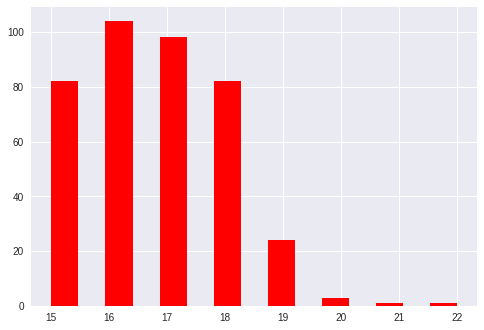

In [0]:
#Analisando a idade dos alunos de matemática
idade_mat = math_students['age']
num_bins = 15
plt.hist(idade_mat, num_bins,facecolor='red', alpha=1)
plt.show()

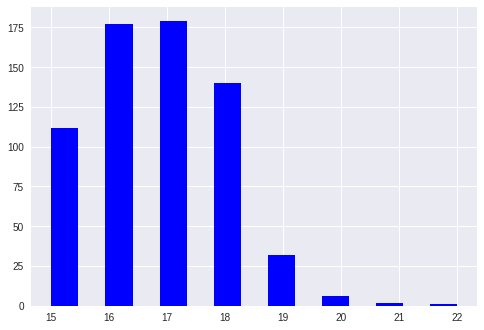

In [0]:
#Analisando a idade dos alunos de português
idade_port = port_students['age']
num_bins = 15
plt.hist(idade_port, num_bins,facecolor='blue', alpha=1)
plt.show()

## Analisando alunos que mais consomem alcool

In [0]:
#Analisando alunos que mais consomem alcool em dias de trabalho e faltas

alunos_mais_cons_alcool = math_students.loc[math_students['Dalc'].isin([4,5])]
alunos_mais_cons_alcool

,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,studytime,failures,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
29,M,16,U,GT3,T,4,4,mother,2,0,...,4,4,5,5,5,5,16,10,12,11
54,F,15,U,LE3,A,3,3,mother,1,0,...,5,3,4,4,4,1,6,10,13,13
61,F,16,U,GT3,T,1,1,father,1,0,...,5,5,5,5,5,5,6,10,8,11
66,M,15,U,GT3,A,4,4,mother,4,0,...,1,3,3,5,5,3,4,13,13,12
100,M,16,U,GT3,T,4,4,mother,1,0,...,4,5,5,5,5,4,14,7,7,5
159,M,16,U,GT3,T,3,3,father,2,1,...,4,5,5,4,4,5,4,10,12,12
175,M,17,U,LE3,T,4,3,mother,2,0,...,4,4,4,4,4,4,4,10,9,9
192,M,17,U,GT3,T,1,2,other,2,0,...,4,4,4,4,5,5,12,7,8,8
211,M,17,U,LE3,T,4,4,mother,2,0,...,5,3,5,4,5,3,13,12,12,13
223,M,18,U,GT3,T,2,2,mother,2,0,...,3,3,3,5,5,4,0,12,13,13


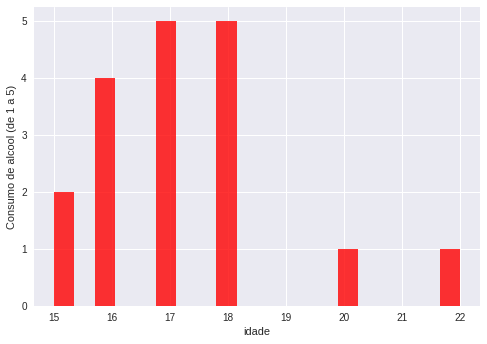

In [0]:
#Analisando alunos que mais consomem alcool em dias de trabalho e idade

idades = alunos_mais_cons_alcool['age']

num_bins = 20
plt.hist(idades, num_bins,facecolor='red', alpha=0.8)
plt.xlabel('idade')
plt.ylabel('Consumo de alcool (de 1 a 5)')
plt.show()


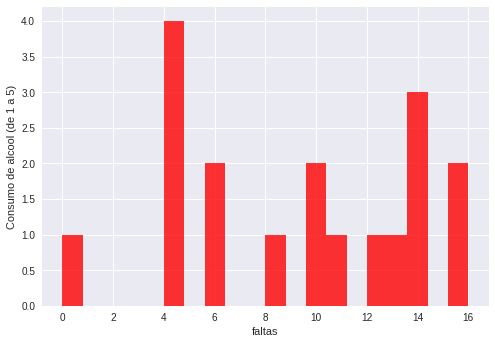

In [0]:
#Analisando alunos que mais consomem alcool em dias de trabalho e faltas

faltas = alunos_mais_cons_alcool['absences']

num_bins = 20
plt.hist(faltas, num_bins,facecolor='red', alpha=0.8)
plt.xlabel('faltas')
plt.ylabel('Consumo de alcool (de 1 a 5)')
plt.show()


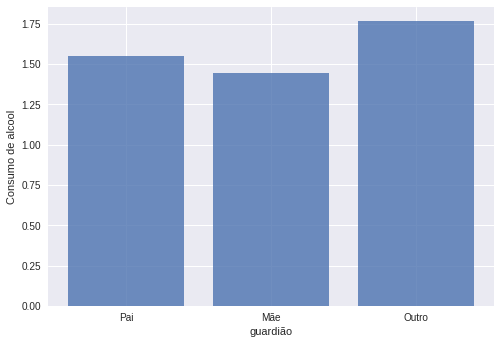

In [0]:
#Consumo de alchool em dias de semana, relacionado com o guardião

mean_mom = full_set[full_set['guardian'] == "mother"]['Dalc'].mean()
mean_dad = full_set[full_set['guardian'] == "father"]['Dalc'].mean()
mean_other = full_set[full_set['guardian'] == "other"]['Dalc'].mean()
plt.bar(range(3),[mean_dad, mean_mom, mean_other],tick_label = ['Pai', 'Mãe', "Outro"], alpha=0.8)
plt.xlabel('guardião')
plt.ylabel('Consumo de alcool')
plt.show()


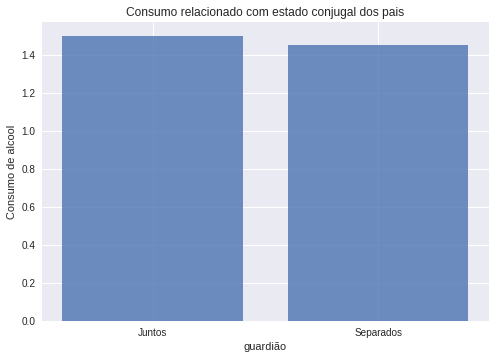

In [0]:
#Consumo de alchool em dias de semana, para alunos com pais juntos e separados

mean_juntos = full_set[full_set['Pstatus'] == "T"]['Dalc'].mean()
mean_separados = full_set[full_set['Pstatus'] == "A"]['Dalc'].mean()
plt.bar(['Juntos', 'Separados'],[mean_juntos, mean_separados], alpha=0.8)
plt.xlabel('guardião')
plt.ylabel('Consumo de alcool')
plt.title("Consumo relacionado com estado conjugal dos pais")
plt.show()

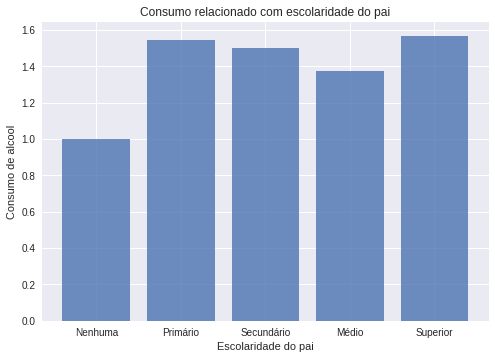

In [0]:
#Consumo de alchool em dias de semana, por escolaridade do pai

mean_0 = full_set[full_set['Fedu'] == 0]['Dalc'].mean()
mean_1 = full_set[full_set['Fedu'] == 1]['Dalc'].mean()
mean_2 = full_set[full_set['Fedu'] == 2]['Dalc'].mean()
mean_3 = full_set[full_set['Fedu'] == 3]['Dalc'].mean()
mean_4 = full_set[full_set['Fedu'] == 4]['Dalc'].mean()
plt.bar(range(5),[mean_0, mean_1, mean_2, mean_3, mean_4,],tick_label = ['Nenhuma','Primário', 'Secundário', 'Médio', 'Superior'], alpha=0.8)
plt.xlabel('Escolaridade do pai')
plt.ylabel('Consumo de alcool')
plt.title("Consumo relacionado com escolaridade do pai")
plt.show()

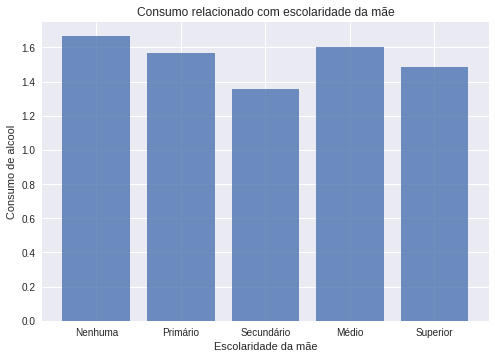

In [0]:
#Consumo de alchool em dias de semana, por escolaridade da mãe

mean_0 = full_set[full_set['Medu'] == 0]['Dalc'].mean()
mean_1 = full_set[full_set['Medu'] == 1]['Dalc'].mean()
mean_2 = full_set[full_set['Medu'] == 2]['Dalc'].mean()
mean_3 = full_set[full_set['Medu'] == 3]['Dalc'].mean()
mean_4 = full_set[full_set['Medu'] == 4]['Dalc'].mean()
plt.bar(range(5),[mean_0, mean_1, mean_2, mean_3, mean_4,],tick_label = ['Nenhuma','Primário', 'Secundário', 'Médio', 'Superior'], alpha=0.8)
plt.xlabel('Escolaridade da mãe')
plt.ylabel('Consumo de alcool')
plt.title("Consumo relacionado com escolaridade da mãe")
plt.show()

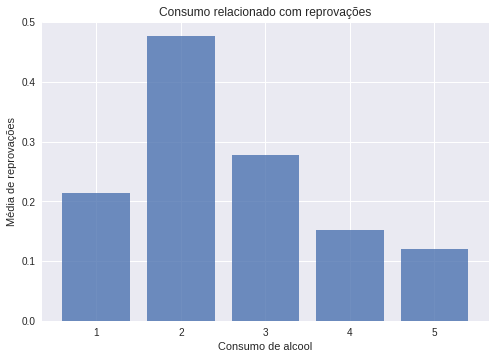

In [0]:
#Consumo de alchool em dias de semana, relacionado com reprovações

mean_1 = full_set[full_set['Dalc'] == 1]['failures'].mean()
mean_2 = full_set[full_set['Fedu'] == 1]['failures'].mean()
mean_3 = full_set[full_set['Fedu'] == 2]['failures'].mean()
mean_4 = full_set[full_set['Fedu'] == 3]['failures'].mean()
mean_5 = full_set[full_set['Fedu'] == 4]['failures'].mean()
plt.bar(range(1, 6),[mean_1, mean_2, mean_3, mean_4, mean_5,], alpha=0.8)
plt.ylabel('Média de reprovações')
plt.xlabel('Consumo de alcool')
plt.title("Consumo relacionado com reprovações")
plt.show()

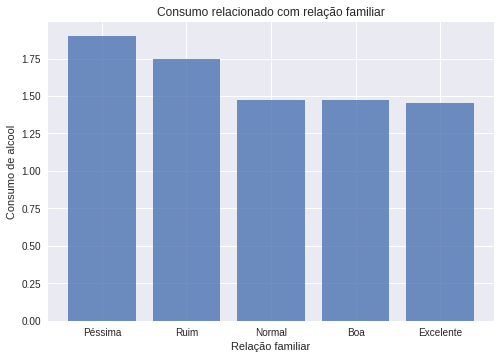

In [0]:
#Consumo de alchool em dias de semana, relacionado com relação familiar

mean_0 = full_set[full_set['famrel'] == 1]['Dalc'].mean()
mean_1 = full_set[full_set['famrel'] == 2]['Dalc'].mean()
mean_2 = full_set[full_set['famrel'] == 3]['Dalc'].mean()
mean_3 = full_set[full_set['famrel'] == 4]['Dalc'].mean()
mean_4 = full_set[full_set['famrel'] == 5]['Dalc'].mean()
plt.bar(range(5),[mean_0, mean_1, mean_2, mean_3, mean_4,],tick_label = ["Péssima", "Ruim", "Normal" , "Boa", "Excelente"], alpha=0.8)
plt.xlabel('Relação familiar')
#plt.xticks(range(5), ["Péssima", "Ruim", "Normal" , "Boa", "Excelente"])
plt.ylabel('Consumo de alcool')
plt.title("Consumo relacionado com relação familiar")
plt.show()

## Unindo datasets

### Problemas iniciais

Como os datasets tem tamanhos diferentes é necessario normalizar mantendo a proporção e igualdade entre os dados, para isso tomamos o cuidade de manter a mesma quantidade de estudantes com idades iguais em ambos datasets